In [ ]:


#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
import seaborn as sns
from random import randrange, uniform
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.externals import joblib

In [2]:
#Setting the working directory
os.chdir("C:/Users/user/Desktop/edWisor/Project/Cab Rental Startup/Data")

In [3]:
#Checking the working directory
os.getcwd()

'C:\\Users\\user\\Desktop\\edWisor\\Project\\Cab Rental Startup\\Data'

In [4]:
#Loading the Data
train = pd.read_csv("train_cab - Copy.csv",na_values={'fare_amount':'430-'})
test = pd.read_csv("test - Copy.csv")
data=[train,test]
for i in data:
    i['pickup_datetime']  = pd.to_datetime(i['pickup_datetime'],errors='coerce')

In [5]:
train.head(5)

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1.0


In [6]:
test.head(5)

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16067 entries, 0 to 16066
Data columns (total 7 columns):
fare_amount          16042 non-null float64
pickup_datetime      16066 non-null datetime64[ns, UTC]
pickup_longitude     16067 non-null float64
pickup_latitude      16067 non-null float64
dropoff_longitude    16067 non-null float64
dropoff_latitude     16067 non-null float64
passenger_count      16012 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 878.7 KB


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
pickup_datetime      9914 non-null datetime64[ns, UTC]
pickup_longitude     9914 non-null float64
pickup_latitude      9914 non-null float64
dropoff_longitude    9914 non-null float64
dropoff_latitude     9914 non-null float64
passenger_count      9914 non-null int64
dtypes: datetime64[ns, UTC](1), float64(4), int64(1)
memory usage: 464.8 KB


In [9]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [10]:
test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


# Exploratory Data Analysis

In [11]:
train['passenger_count'].unique()

array([1.000e+00, 2.000e+00, 3.000e+00,       nan, 6.000e+00, 5.000e+00,
       4.000e+00, 2.360e+02, 4.560e+02, 5.334e+03, 0.000e+00, 5.350e+02,
       3.540e+02, 5.500e+01, 5.540e+02, 5.300e+01, 3.500e+01, 3.450e+02,
       5.345e+03, 5.360e+02, 4.300e+01, 5.800e+01, 5.370e+02, 8.700e+01,
       5.312e+02, 1.300e+00, 1.200e-01, 5.570e+02])

In [12]:
#We observe there are some undesired values and outliers in the passenger_count. We will remove them.

In [13]:
for i in range(4,11):
    print('passenger_count above' +str(i)+'={}'.format(sum(train['passenger_count']>i)))

passenger_count above4=1367
passenger_count above5=322
passenger_count above6=20
passenger_count above7=20
passenger_count above8=20
passenger_count above9=20
passenger_count above10=20


In [14]:
#So, there are 20 observations in passenger_count which are constatntly above 6. Let's have a look at them.

In [15]:
#Checking passenger_count > 6 because maximum number of passengers in test is 6 and also a cab can't accomodate more than 6 people. 
train[train['passenger_count']>6] 

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
233,8.5,2011-07-24 01:14:35+00:00,0.000000,0.000000,0.000000,0.000000,236.0
263,4.9,2010-07-12 09:44:33+00:00,-73.983249,40.734655,-73.991278,40.738918,456.0
293,6.1,2011-01-18 23:48:00+00:00,-74.006642,40.738927,-74.010828,40.717907,5334.0
356,8.5,2013-06-18 10:27:05+00:00,-73.992108,40.764203,-73.973000,40.762695,535.0
386,8.1,2009-08-21 19:35:05+00:00,-73.960853,40.761557,-73.976335,40.748361,354.0
413,NaN,2013-09-12 11:32:00+00:00,-73.982060,40.772705,-73.956213,40.771777,55.0
971,10.1,2010-11-21 01:41:00+00:00,-74.004500,40.742143,-73.994330,40.720412,554.0
1007,3.7,2010-12-14 14:46:00+00:00,-73.969157,40.759000,-73.968763,40.764617,53.0
1043,5.7,2012-08-22 22:08:29+00:00,-73.973573,40.760184,-73.953564,40.767392,35.0
1107,4.9,2009-08-08 21:50:50+00:00,-73.988977,40.721068,-73.982368,40.732064,345.0


In [16]:
#Let's check if there are any passenger_count values which are < 1.

In [17]:
#Checking passenger count < 1 because minimum number of passengers in a cab must be 1.
train[train['passenger_count']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
314,34.0,2015-06-02 23:16:15+00:00,-73.974899,40.751095,-73.908546,40.881878,0.00
566,4.9,2012-01-28 21:33:18+00:00,-73.955322,40.782840,-73.955797,40.773673,0.00
678,6.5,2012-02-27 07:24:20+00:00,-73.983397,40.738183,-73.971395,40.758023,0.00
1160,13.3,2011-05-25 23:58:48+00:00,-73.998360,40.740348,-73.946455,40.777348,0.00
1935,10.1,2011-10-23 11:09:28+00:00,-73.971400,40.795000,-73.967900,40.768600,0.00
2200,8.1,2011-05-23 16:54:19+00:00,-73.988008,40.748303,-74.005185,40.738733,0.00
2425,8.9,2011-11-25 22:47:33+00:00,-73.999900,40.738600,-73.971800,40.746300,0.00
3034,5.7,2011-03-06 12:03:14+00:00,-73.986557,40.745783,-73.994545,40.729995,0.00
3413,7.3,2011-02-28 06:39:16+00:00,-73.973413,40.743708,-73.985220,40.741583,0.00
3481,11.3,2011-11-30 17:23:02+00:00,-73.968100,40.762500,-73.984400,40.760900,0.00


In [18]:
#Let's check how many of these observations are there.
len(train[train['passenger_count']<1])

58

In [19]:
#Now, we will remove passenger_count > 6 and passenger_count < 1. So, we will remove 20 + 58 = 78 rows.
train.shape

(16067, 7)

In [20]:
#Removing the undesired observations
train = train.drop(train[train['passenger_count']>6].index, axis=0)
train = train.drop(train[train['passenger_count']<1].index, axis=0)

In [21]:
train.shape #As we can see, we have succesfully removed the observations.

(15989, 7)

In [22]:
#We have observed that there are some negative values in fare_amount. Also, fare_amount cannot be 0. So, we will remove such observations.
#First, we need to change the datatype of fare_amount:
train['fare_amount'] = train['fare_amount'].astype('float')
sum(train['fare_amount']<1)

5

In [23]:
#Let's chechk these observations
train[train['fare_amount']<1]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,-2.90,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1.0
2486,-2.50,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1.0
2780,0.01,2015-05-01 15:38:41+00:00,-73.939041,40.713963,-73.941673,40.713997,1.0
10002,0.00,2010-02-15 14:26:01+00:00,-73.987115,40.738808,-74.005911,40.713960,1.0
13032,-3.00,2013-08-30 08:57:10+00:00,-73.995062,40.740755,-73.995885,40.741357,4.0


In [24]:
train.shape

(15989, 7)

In [25]:
#Let's remove such observations
train = train.drop(train[train['fare_amount']<1].index, axis=0)

In [26]:
train.shape #We have succesfully removed the observations.

(15984, 7)

In [27]:
#Our basic knowledge tells us that latitudes range from -90 to +90 and longitudes range from -180 to +180.
#We'll check for values which do not satisfy those conditions:
print('pickup_longitude above 180={}'.format(sum(train['pickup_longitude']>180)))
print('pickup_longitude below -180={}'.format(sum(train['pickup_longitude']<-180)))
print('pickup_latitude above 90={}'.format(sum(train['pickup_latitude']>90)))
print('pickup_latitude below -90={}'.format(sum(train['pickup_latitude']<-90)))
print('dropoff_longitude above 180={}'.format(sum(train['dropoff_longitude']>180)))
print('dropoff_longitude below -180={}'.format(sum(train['dropoff_longitude']<-180)))
print('dropoff_latitude below -90={}'.format(sum(train['dropoff_latitude']<-90)))
print('dropoff_latitude above 90={}'.format(sum(train['dropoff_latitude']>90)))

pickup_longitude above 180=0
pickup_longitude below -180=0
pickup_latitude above 90=1
pickup_latitude below -90=0
dropoff_longitude above 180=0
dropoff_longitude below -180=0
dropoff_latitude below -90=0
dropoff_latitude above 90=0


In [28]:
#There's only one outlier which is in variable pickup_latitude and we will remove it.
#Also we will see if there are any values equal to 0.
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    print(i,'equal to 0={}'.format(sum(train[i]==0)))

pickup_longitude equal to 0=311
pickup_latitude equal to 0=311
dropoff_longitude equal to 0=312
dropoff_latitude equal to 0=310


In [29]:
train.shape


(15984, 7)

In [30]:
# there are values which are equal to 0. we will remove them.
#We will also remove the one value in pickup_latitude variable.
train = train.drop(train[train['pickup_latitude']>90].index, axis=0)
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
    train = train.drop(train[train[i]==0].index, axis=0)

In [31]:
train.shape

(15661, 7)

In [32]:
#Making a copy of train in an object df
df=train.copy()

# MISSING VALUE ANALYSIS

In [33]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(train.isnull().sum())

missing_val

,0
fare_amount,22
pickup_datetime,1
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,55


In [34]:
#Reset index
missing_val = missing_val.reset_index()

missing_val

,index,0
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [35]:
#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

missing_val

,Variables,Missing_percentage
0,fare_amount,22
1,pickup_datetime,1
2,pickup_longitude,0
3,pickup_latitude,0
4,dropoff_longitude,0
5,dropoff_latitude,0
6,passenger_count,55


In [36]:
#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(train))*100
missing_val

,Variables,Missing_percentage
0,fare_amount,0.140476
1,pickup_datetime,0.006385
2,pickup_longitude,0.000000
3,pickup_latitude,0.000000
4,dropoff_longitude,0.000000
5,dropoff_latitude,0.000000
6,passenger_count,0.351191


In [37]:
#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)
missing_val

,Variables,Missing_percentage
0,passenger_count,0.351191
1,fare_amount,0.140476
2,pickup_datetime,0.006385
3,pickup_longitude,0.000000
4,pickup_latitude,0.000000
5,dropoff_longitude,0.000000
6,dropoff_latitude,0.000000


In [38]:
#save output results 
missing_val.to_csv("Miising_perc_python.csv", index = False)

In [39]:
#For passenger_count[500]:
#Actual Value =1
#Mode = 1.0
#KNN with 3 = 1.28

train['passenger_count'].loc[500] = np.nan



E:\Anaconda\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [40]:
#Imputing with mode:
#train['passenger_count'] = train['passenger_count'].fillna(train['passenger_count'].mode()[0]).loc[500]

In [41]:
#We will first seperate pickup_datetime from the other variables in order to use KNN
columns=['fare_amount', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude', 'passenger_count']
#We will merge the seperated pickup_datetime dataframe later with train
pickup_datetime=pd.DataFrame(train['pickup_datetime'])

In [42]:
#Imputing with KNN. Not running the knn here as we will run it later when we impute the missing values of fare_amount.
#train = pd.DataFrame(KNN(k = 3).fit_transform(train.drop('pickup_datetime',axis=1)),columns=columns, index=train.index)

In [43]:
#We can't use the mode method since this data is heavily biased towards passenger_count=1. So, we will use knn method here.

In [44]:
#For fare_amount[500]:
#Actual Value = 6.0
#Mean Method = 15.118
#Median Method = 8.5
#KNN Method with 3 = 5.5

train['fare_amount'].loc[500] =np.nan

In [45]:
#Imputing with Mean Method:
#train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount']).mean()

In [46]:
#Imputing with Median Method:
#train['fare_amount'] = train['fare_amount'].fillna(train['fare_amount']).median()

In [47]:
#KNN Method:
train = pd.DataFrame(KNN(k = 3).fit_transform(train.drop('pickup_datetime',axis=1)),columns=columns)

Imputing row 1/15661 with 0 missing, elapsed time: 34.869
Imputing row 101/15661 with 0 missing, elapsed time: 34.870
Imputing row 201/15661 with 0 missing, elapsed time: 34.871
Imputing row 301/15661 with 0 missing, elapsed time: 34.872
Imputing row 401/15661 with 0 missing, elapsed time: 34.873
Imputing row 501/15661 with 0 missing, elapsed time: 34.873
Imputing row 601/15661 with 0 missing, elapsed time: 34.874
Imputing row 701/15661 with 0 missing, elapsed time: 34.875
Imputing row 801/15661 with 0 missing, elapsed time: 34.876
Imputing row 901/15661 with 0 missing, elapsed time: 34.877
Imputing row 1001/15661 with 0 missing, elapsed time: 34.877
Imputing row 1101/15661 with 0 missing, elapsed time: 34.877
Imputing row 1201/15661 with 0 missing, elapsed time: 34.878
Imputing row 1301/15661 with 0 missing, elapsed time: 34.878
Imputing row 1401/15661 with 0 missing, elapsed time: 34.879
Imputing row 1501/15661 with 0 missing, elapsed time: 34.879
Imputing row 1601/15661 with 0 missi

In [48]:
train.std()

fare_amount          435.662022
pickup_longitude       2.659050
pickup_latitude        2.613305
dropoff_longitude      2.710835
dropoff_latitude       2.632400
passenger_count        1.265172
dtype: float64

In [49]:
train['passenger_count'].head()

0    1.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: passenger_count, dtype: float64

In [50]:
train.loc[79]

fare_amount           8.500000
pickup_longitude    -73.953710
pickup_latitude      40.790813
dropoff_longitude   -73.957015
dropoff_latitude     40.777676
passenger_count       1.000000
Name: 79, dtype: float64

In [51]:
train.loc[94]

fare_amount           9.000000
pickup_longitude    -73.984977
pickup_latitude      40.752122
dropoff_longitude   -74.000925
dropoff_latitude     40.757982
passenger_count       1.000000
Name: 94, dtype: float64

In [52]:
train.loc[198]

fare_amount          11.300000
pickup_longitude    -73.993973
pickup_latitude      40.746577
dropoff_longitude   -74.005060
dropoff_latitude     40.709365
passenger_count       1.000000
Name: 198, dtype: float64

In [53]:
train.loc[1317]

fare_amount          12.500000
pickup_longitude    -73.991753
pickup_latitude      40.731875
dropoff_longitude   -73.967462
dropoff_latitude     40.760708
passenger_count       1.000000
Name: 1317, dtype: float64

In [54]:
train.loc[482]

fare_amount           6.607108
pickup_longitude    -74.000405
pickup_latitude      40.718570
dropoff_longitude   -74.000040
dropoff_latitude     40.726592
passenger_count       1.000000
Name: 482, dtype: float64

In [55]:
train['passenger_count']=train['passenger_count'].astype('int')


In [56]:
train.loc[79]

fare_amount           8.500000
pickup_longitude    -73.953710
pickup_latitude      40.790813
dropoff_longitude   -73.957015
dropoff_latitude     40.777676
passenger_count       0.000000
Name: 79, dtype: float64

In [57]:
train.loc[94]

fare_amount           9.000000
pickup_longitude    -73.984977
pickup_latitude      40.752122
dropoff_longitude   -74.000925
dropoff_latitude     40.757982
passenger_count       0.000000
Name: 94, dtype: float64

In [58]:
train.loc[198]

fare_amount          11.300000
pickup_longitude    -73.993973
pickup_latitude      40.746577
dropoff_longitude   -74.005060
dropoff_latitude     40.709365
passenger_count       0.000000
Name: 198, dtype: float64

In [59]:
train.loc[1317]

fare_amount          12.500000
pickup_longitude    -73.991753
pickup_latitude      40.731875
dropoff_longitude   -73.967462
dropoff_latitude     40.760708
passenger_count       0.000000
Name: 1317, dtype: float64

In [60]:
train.loc[482]

fare_amount           6.607108
pickup_longitude    -74.000405
pickup_latitude      40.718570
dropoff_longitude   -74.000040
dropoff_latitude     40.726592
passenger_count       0.000000
Name: 482, dtype: float64

In [61]:
#As we can se 5 new observations passenger_count have been rounded off to 0. So, we will delete these observations.
train.shape

(15661, 6)

In [62]:
train[train['passenger_count']==0]#Noting down the index numbers since we will need to delete the rows from pickup_datetime Dataframe as well.
#79,94,198,482,1317

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
79,8.500000,-73.953710,40.790813,-73.957015,40.777676,0
94,9.000000,-73.984977,40.752122,-74.000925,40.757982,0
198,11.300000,-73.993973,40.746577,-74.005060,40.709365,0
482,6.607108,-74.000405,40.718570,-74.000040,40.726592,0
1317,12.500000,-73.991753,40.731875,-73.967462,40.760708,0


In [63]:
train = train.drop(train[train['passenger_count']==0].index, axis=0)
train.shape #We have successfully deleted the 4 rows.

(15656, 6)

In [64]:
pickup_datetime.shape

(15661, 1)

In [65]:
pickup_datetime = pickup_datetime.drop(pickup_datetime.index[[79,94,198,1317]])

In [66]:
pickup_datetime.shape

(15657, 1)

In [67]:
train['passenger_count'].unique()

array([1, 2, 3, 6, 5, 4], dtype=int64)

In [68]:
train['passenger_count']=train['passenger_count'].round().astype('object').astype('category',ordered=True)

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3325: FutureWarning: specifying 'categories' or 'ordered' in .astype() is deprecated; pass a CategoricalDtype instead
  exec(code_obj, self.user_global_ns, self.user_ns)


In [69]:
train['passenger_count'].unique()

[1, 2, 3, 6, 5, 4]
Categories (6, int64): [1 < 2 < 3 < 4 < 5 < 6]

In [70]:
#Now, we have one missing value in pickup_datetime
#Creating dataframe with missing percentage
missing_val = pd.DataFrame(pickup_datetime.isnull().sum())
#Reset index
missing_val = missing_val.reset_index()
missing_val

,index,0
0,pickup_datetime,1


In [71]:
pickup_datetime.shape

(15657, 1)

In [72]:
train.shape

(15656, 6)

In [73]:
#We will drop 1 row which has missing value for pickup_datetime variable after completing the Feature Engineering stage because if we drop now, pickup_datetime Dataframe will have one lesser row than train Datframe, then if we merge these 2 dataframes then pickup_datetime variable will gain 1 missing value.
#And if we were to merge and then drop now then we would need to require to split again before outlier analysis and then merge again in the final Dat Pre-Porcessing stage.
#So, we would drop the mssing value later.

In [74]:
df1 = train.copy()
train=df1.copy()

In [75]:
train.shape

(15656, 6)

In [76]:
train['passenger_count'].describe()

count     15656
unique        6
top           1
freq      11050
Name: passenger_count, dtype: int64

In [77]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15656.000000,15656.000000,15656.000000,15656.000000,15656.000000
mean,15.113589,-73.911490,40.689694,-73.906290,40.687636
std,435.731576,2.659475,2.613723,2.711268,2.632820
min,1.140000,-74.438233,-74.006893,-74.429332,-74.006377
25%,6.000000,-73.992389,40.736543,-73.991364,40.736294
50%,8.500000,-73.982047,40.753312,-73.980552,40.754238
75%,12.500000,-73.968079,40.767805,-73.965359,40.768313
max,54343.000000,40.766125,41.366138,40.802437,41.366138


# OUTLIER ANALYSIS

In [78]:
#We will do the Outlier Analysis only on fare_amount now.

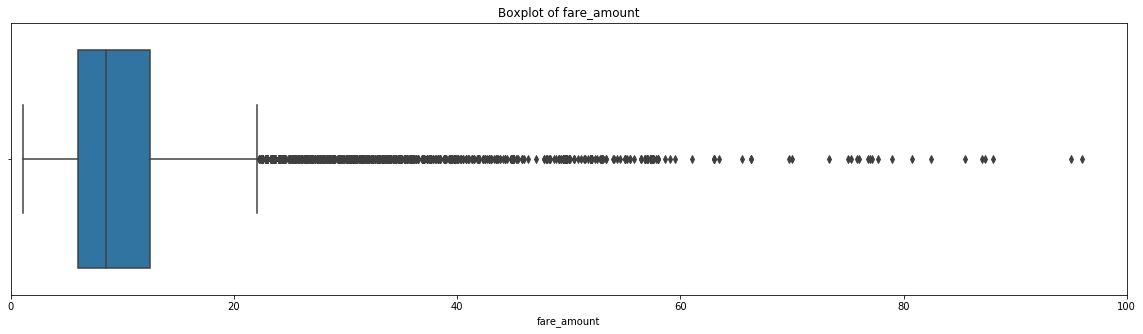

In [79]:
#Boxplot for fare_amount
   
plt.figure(figsize=(20,5)) 
plt.xlim(0,100)
sns.boxplot(x=train['fare_amount'],data=train,orient='h')
plt.title('Boxplot of fare_amount')
plt.savefig('bp of fare_amount.png')
plt.show()

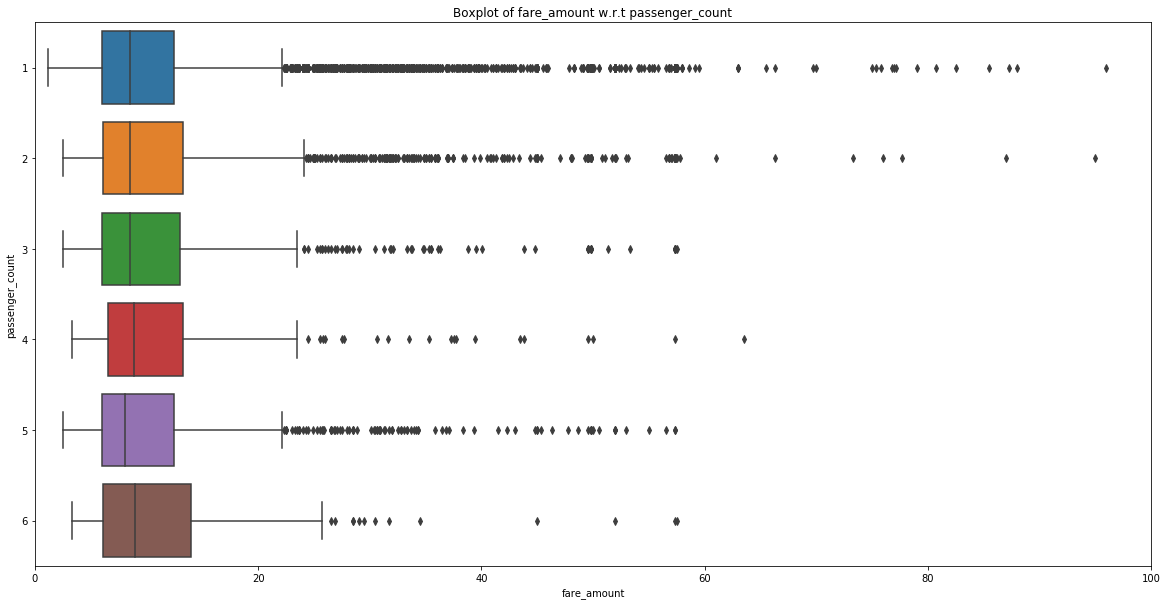

In [80]:
#BoxPlot of fare_amount vs passenger_count
plt.figure(figsize=(20,10))
plt.xlim(0,100)
_ = sns.boxplot(x=train['fare_amount'],y=train['passenger_count'],data=train,orient='h')
plt.title('Boxplot of fare_amount w.r.t passenger_count')
plt.savefig('Boxplot of fare_amount w.r.t passenger_count.png')
plt.show()

In [81]:
#We can see there are a lot of outliers.
#Let's treat the outliers by replacing them with NAs

q75,q25 = np.percentile(train['fare_amount'],[75,25])
iqr = q75-q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)

print(min)
print(max)


# #Replace with NA
# marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
# marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan
train.loc[train['fare_amount'] < min,:'fare_amount'] = np.nan
train.loc[train['fare_amount'] > max,:'fare_amount'] = np.nan

-3.75
22.25


In [82]:
train.shape

(15656, 6)

In [83]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,1360
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [84]:
train.std()

fare_amount          4.136625
pickup_longitude     2.659475
pickup_latitude      2.613723
dropoff_longitude    2.711268
dropoff_latitude     2.632820
passenger_count      1.264935
dtype: float64

In [85]:
#Imputing with missing values using KNN
train = pd.DataFrame(KNN(k = 3).fit_transform(train), columns = train.columns, index=train.index)

Imputing row 1/15656 with 0 missing, elapsed time: 36.391
Imputing row 101/15656 with 1 missing, elapsed time: 36.395
Imputing row 201/15656 with 0 missing, elapsed time: 36.398
Imputing row 301/15656 with 0 missing, elapsed time: 36.399
Imputing row 401/15656 with 0 missing, elapsed time: 36.401
Imputing row 501/15656 with 0 missing, elapsed time: 36.403
Imputing row 601/15656 with 0 missing, elapsed time: 36.405
Imputing row 701/15656 with 0 missing, elapsed time: 36.407
Imputing row 801/15656 with 0 missing, elapsed time: 36.409
Imputing row 901/15656 with 0 missing, elapsed time: 36.414
Imputing row 1001/15656 with 0 missing, elapsed time: 36.416
Imputing row 1101/15656 with 0 missing, elapsed time: 36.417
Imputing row 1201/15656 with 0 missing, elapsed time: 36.419
Imputing row 1301/15656 with 1 missing, elapsed time: 36.421
Imputing row 1401/15656 with 0 missing, elapsed time: 36.422
Imputing row 1501/15656 with 0 missing, elapsed time: 36.424
Imputing row 1601/15656 with 0 missi

In [86]:
pd.DataFrame(train.isnull().sum()) #We have succesfully imputed all the NA values.

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [87]:
train.std()

fare_amount          4.477959
pickup_longitude     2.659475
pickup_latitude      2.613723
dropoff_longitude    2.711268
dropoff_latitude     2.632820
passenger_count      1.264935
dtype: float64

In [88]:
train['passenger_count'].describe()

count    15656.000000
mean         1.650166
std          1.264935
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [89]:
train.shape

(15656, 6)

In [90]:
pickup_datetime.shape

(15657, 1)

In [91]:
#Let's merge the two Dataframes:
# we will Join 2 Dataframes pickup_datetime and train
train = pd.concat([pickup_datetime.reset_index(drop=True),train],axis=1)




In [92]:
pd.DataFrame(train.isnull().sum()) #We are expecting some NA values now since we have merged them.

,0
pickup_datetime,5
fare_amount,5
pickup_longitude,5
pickup_latitude,5
dropoff_longitude,5
dropoff_latitude,5
passenger_count,5


In [93]:
#Let's drop these observations.
train=train.dropna()

In [94]:
train.shape

(15651, 7)

In [95]:
pd.DataFrame(train.isnull().sum())#We have successfully removed all the NAs

,0
pickup_datetime,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


In [96]:
train = train.reset_index(drop=True)


In [97]:
#Removing more observations which are outside of North America:
#Minimum and Maximum Latitudes for North America, Min=39.6 and Max=41.4
#Minimum and Maximum Longitudes for North America, Min=-73.1 and Max=-74.4

In [98]:
#For latitudes of Pickup Data:
train[(train['pickup_latitude']<39.6) | (train['pickup_latitude']>41.4)]
train = train.drop(train[(train['pickup_latitude']<39.6) | (train['pickup_latitude']>41.4)].index,axis=0)
train.shape

(15642, 7)

In [99]:
#For longitudes of Pickup Data:
train[(train['pickup_longitude']>-73.1) | (train['pickup_longitude']<-74.4)]
train = train.drop(train[(train['pickup_longitude']>-73.1) | (train['pickup_longitude']<-74.4)].index,axis=0)
train.shape

(15640, 7)

In [100]:
#For latitudes of Dropoff Data:
train[(train['dropoff_latitude']<39.6) | (train['dropoff_latitude']>41.4)]
train = train.drop(train[(train['dropoff_latitude']<39.6) | (train['dropoff_latitude']>41.4)].index,axis=0)
train.shape

(15639, 7)

In [101]:
#For longitudes of Dropoff Data:
train[(train['dropoff_longitude']>-73.1) | (train['dropoff_longitude']<-74.4)]
train = train.drop(train[(train['dropoff_longitude']>-73.1) | (train['dropoff_longitude']<-74.4)].index,axis=0)
train.shape

(15638, 7)

In [102]:
train['passenger_count'].describe()

count    15638.000000
mean         1.649891
std          1.264733
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [103]:
train['passenger_count']=train['passenger_count'].astype('int').round().astype('object').astype('category')

In [104]:
train['passenger_count'].describe()

count     15638
unique        6
top           1
freq      11040
Name: passenger_count, dtype: int64

In [105]:
train.shape

(15638, 7)

In [106]:
train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
count,15638.000000,15638.000000,15638.000000,15638.000000,15638.000000
mean,9.404902,-73.974773,40.750927,-73.973804,40.751437
std,4.478916,0.041194,0.037894,0.039145,0.039605
min,1.140000,-74.229138,39.603178,-74.227047,39.604972
25%,6.000000,-73.992387,40.736587,-73.991363,40.736339
50%,8.200000,-73.982051,40.753345,-73.980559,40.754254
75%,11.798730,-73.968104,40.767809,-73.965386,40.768336
max,22.100000,-73.137393,41.366138,-73.137393,41.366138


In [107]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1


In [108]:
df2=train.copy()
train=df2.copy()
train.shape

(15638, 7)

# FEATURE ENGINEERING

In [109]:
# We will segregate pickup_datetime variable to derive new features/variables namely year,month,day of the week and hour.
train['pickup_date'] = train["pickup_datetime"].apply(lambda row: row.date)
train['pickup_year'] = train["pickup_datetime"].apply(lambda row: row.year)
train['pickup_month'] = train["pickup_datetime"].apply(lambda row: row.month)
train['pickup_weekday'] = train["pickup_datetime"].apply(lambda row: row.dayofweek)
train['pickup_hour'] = train["pickup_datetime"].apply(lambda row: row.hour)


In [110]:
train.head()

,pickup_datetime,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,2009-06-15 17:26:21+00:00,4.5,-73.844311,40.721319,-73.841610,40.712278,1,2009-06-15,2009,6,0,17
1,2010-01-05 16:52:16+00:00,16.9,-74.016048,40.711303,-73.979268,40.782004,1,2010-01-05,2010,1,1,16
2,2011-08-18 00:35:00+00:00,5.7,-73.982738,40.761270,-73.991242,40.750562,2,2011-08-18,2011,8,3,0
3,2012-04-21 04:30:42+00:00,7.7,-73.987130,40.733143,-73.991567,40.758092,1,2012-04-21,2012,4,5,4
4,2010-03-09 07:51:00+00:00,5.3,-73.968095,40.768008,-73.956655,40.783762,1,2010-03-09,2010,3,1,7


In [111]:
train['pickup_month'].describe()

count    15638.000000
mean         6.268065
std          3.447041
min          1.000000
25%          3.000000
50%          6.000000
75%          9.000000
max         12.000000
Name: pickup_month, dtype: float64

In [112]:
#We will add the same features to test data
test['pickup_date'] = test["pickup_datetime"].apply(lambda row: row.date)
test['pickup_year'] = test["pickup_datetime"].apply(lambda row: row.year)
test['pickup_month'] = test["pickup_datetime"].apply(lambda row: row.month)
test['pickup_weekday'] = test["pickup_datetime"].apply(lambda row: row.dayofweek)
test['pickup_hour'] = test["pickup_datetime"].apply(lambda row: row.hour)

In [113]:
test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,2015-01-27 13:08:24+00:00,-73.973320,40.763805,-73.981430,40.743835,1,2015-01-27,2015,1,1,13
1,2015-01-27 13:08:24+00:00,-73.986862,40.719383,-73.998886,40.739201,1,2015-01-27,2015,1,1,13
2,2011-10-08 11:53:44+00:00,-73.982524,40.751260,-73.979654,40.746139,1,2011-10-08,2011,10,5,11
3,2012-12-01 21:12:12+00:00,-73.981160,40.767807,-73.990448,40.751635,1,2012-12-01,2012,12,5,21
4,2012-12-01 21:12:12+00:00,-73.966046,40.789775,-73.988565,40.744427,1,2012-12-01,2012,12,5,21


In [114]:
#Let's remove the unwanted variables.
train = train.drop(['pickup_datetime','pickup_date'],axis=1)
test = test.drop(['pickup_datetime','pickup_date'],axis=1)

In [115]:
train.head()
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21


In [116]:
#Defining the functions to calculate the distance using pickup and dropff coordinates.

In [117]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
pickup_year,0
pickup_month,0
pickup_weekday,0
pickup_hour,0


In [118]:
def haversine(long1,lat1,long2,lat2):
    data = [train,test]
    for i in data:
        R = 6371000 #Radius of Earth in meters
        phi_1 = np.radians(i[lat1])
        phi_2 = np.radians(i[lat2])
        delta_phi = np.radians(i[lat2] - i[lat1])
        delta_lambda = np.radians(i[long2] - i[long1])
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
        meters = R * c  # output distance in meters
        km = meters / 1000.0  # output distance in kilometers
    
    return km
    
    

In [119]:
# Using haversine formula to calculate distance for both train and test
train['Distance'] =  haversine('pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude')
test['Distance'] = haversine('pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude')

In [120]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
pickup_year,0
pickup_month,0
pickup_weekday,0
pickup_hour,0


In [121]:
#Imputing with missing values using KNN
train = pd.DataFrame(KNN(k = 3).fit_transform(train), columns = train.columns, index=train.index)


Imputing row 1/15638 with 0 missing, elapsed time: 46.578
Imputing row 101/15638 with 0 missing, elapsed time: 46.578
Imputing row 201/15638 with 0 missing, elapsed time: 46.579
Imputing row 301/15638 with 0 missing, elapsed time: 46.579
Imputing row 401/15638 with 0 missing, elapsed time: 46.580
Imputing row 501/15638 with 0 missing, elapsed time: 46.580
Imputing row 601/15638 with 0 missing, elapsed time: 46.580
Imputing row 701/15638 with 0 missing, elapsed time: 46.581
Imputing row 801/15638 with 0 missing, elapsed time: 46.581
Imputing row 901/15638 with 0 missing, elapsed time: 46.582
Imputing row 1001/15638 with 0 missing, elapsed time: 46.582
Imputing row 1101/15638 with 0 missing, elapsed time: 46.582
Imputing row 1201/15638 with 0 missing, elapsed time: 46.583
Imputing row 1301/15638 with 0 missing, elapsed time: 46.583
Imputing row 1401/15638 with 0 missing, elapsed time: 46.583
Imputing row 1501/15638 with 0 missing, elapsed time: 46.584
Imputing row 1601/15638 with 0 missi

Imputing row 14201/15638 with 1 missing, elapsed time: 47.340
Imputing row 14301/15638 with 1 missing, elapsed time: 47.358
Imputing row 14401/15638 with 1 missing, elapsed time: 47.376
Imputing row 14501/15638 with 1 missing, elapsed time: 47.390
Imputing row 14601/15638 with 1 missing, elapsed time: 47.404
Imputing row 14701/15638 with 1 missing, elapsed time: 47.418
Imputing row 14801/15638 with 1 missing, elapsed time: 47.432
Imputing row 14901/15638 with 1 missing, elapsed time: 47.445
Imputing row 15001/15638 with 1 missing, elapsed time: 47.459
Imputing row 15101/15638 with 1 missing, elapsed time: 47.473
Imputing row 15201/15638 with 1 missing, elapsed time: 47.487
Imputing row 15301/15638 with 1 missing, elapsed time: 47.501
Imputing row 15401/15638 with 1 missing, elapsed time: 47.515
Imputing row 15501/15638 with 1 missing, elapsed time: 47.532
Imputing row 15601/15638 with 1 missing, elapsed time: 47.551


In [122]:
pd.DataFrame(train.isnull().sum())

,0
fare_amount,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0
pickup_year,0
pickup_month,0
pickup_weekday,0
pickup_hour,0


In [123]:
test.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance
0,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,1,13,2.323259
1,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,1,13,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,5,11,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,5,21,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,5,21,5.387301


In [124]:
#Let's remove the variables which were used to create new variables as they are of no use to us.
train = train.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)
test = test.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1)

In [125]:
train.head()
test.head()

,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,Distance
0,1,2015,1,1,13,2.323259
1,1,2015,1,1,13,2.425353
2,1,2011,10,5,11,0.618628
3,1,2012,12,5,21,1.961033
4,1,2012,12,5,21,5.387301


# FEATURE SELECTION

In [126]:
#Correlation Analysis:
cnames= ["fare_amount","distance"]
#Correlation plot
df_corr = train.loc[:,cnames]

E:\Anaconda\lib\site-packages\pandas\core\indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


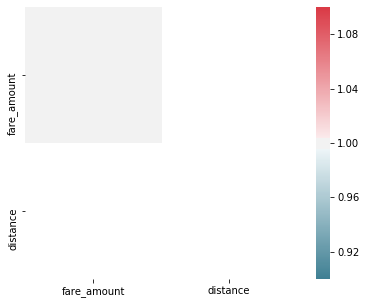

In [127]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [128]:
#model_name = ols('outcome_variable ~ group1 + group2 + groupN', data=your_data).fit() 
model_name = ols('fare_amount ~ C(passenger_count) + C(pickup_year) + C(pickup_month) + C(pickup_weekday) + C(pickup_hour)',data = train).fit()

In [129]:
aov_table = sm.stats.anova_lm(model_name)

In [130]:
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(passenger_count),5.0,261.253408,52.250682,2.609293,0.022986
C(pickup_year),6.0,86.196416,14.366069,0.717412,0.635553
C(pickup_month),11.0,225.666029,20.515094,1.024482,0.421053
C(pickup_weekday),6.0,307.036950,51.172825,2.555467,0.017859
C(pickup_hour),23.0,701.587056,30.503785,1.523297,0.051777
Residual,15586.0,312107.228878,20.024845,NaN,NaN


In [131]:
#The p-values of pickup_year and pickup_month are greater than 0.05 so we will reject the alternate hypothesis for them
#as these two variables and the target variable are independent of each other.
#Also, not removing pickup_hour as its p-value is 0.051 which is only borderline greater than 0.05. Also, we can't remove three variables now becausethen we would only have two categorical variables. 

In [132]:
train = train.drop(['pickup_year','pickup_month'],axis=1)
#train.head()

In [133]:
#Let's do the same to test data set as well
test = test.drop(['pickup_year','pickup_month'],axis=1)
#test.head()

# FEATURE SCALING

In [134]:
train['fare_amount'].describe()

count    15638.000000
mean         9.404902
std          4.478916
min          1.140000
25%          6.000000
50%          8.200000
75%         11.798730
max         22.100000
Name: fare_amount, dtype: float64

In [135]:
train['Distance'].describe()

count    15638.000000
mean         3.429691
std          3.461140
min          0.000000
25%          1.523522
50%          2.464666
75%          4.124759
max         99.996040
Name: Distance, dtype: float64

In [136]:
train['fare_amount'].std()

4.478915872311411

In [137]:
train['Distance'].std()

3.4611395533558755

In [138]:
train['fare_amount'].var()

20.060687391243093

In [139]:
train['Distance'].var()

11.97948700780451

(array([1.000e+00, 0.000e+00, 5.600e+01, 4.200e+01, 1.470e+02, 2.770e+02,
        4.850e+02, 6.660e+02, 7.590e+02, 8.320e+02, 1.277e+03, 7.780e+02,
        7.780e+02, 6.880e+02, 3.830e+02, 6.750e+02, 6.380e+02, 8.330e+02,
        5.270e+02, 4.780e+02, 4.710e+02, 4.270e+02, 3.650e+02, 3.150e+02,
        4.150e+02, 1.430e+02, 2.720e+02, 2.510e+02, 2.020e+02, 1.850e+02,
        1.930e+02, 2.260e+02, 1.920e+02, 1.780e+02, 1.590e+02, 1.530e+02,
        7.300e+01, 1.280e+02, 1.670e+02, 1.450e+02, 1.430e+02, 1.230e+02,
        1.270e+02, 9.900e+01, 1.060e+02, 6.000e+01]),
 array([ 1.14      ,  1.59565217,  2.05130435,  2.50695652,  2.9626087 ,
         3.41826087,  3.87391304,  4.32956522,  4.78521739,  5.24086957,
         5.69652174,  6.15217391,  6.60782609,  7.06347826,  7.51913043,
         7.97478261,  8.43043478,  8.88608696,  9.34173913,  9.7973913 ,
        10.25304348, 10.70869565, 11.16434783, 11.62      , 12.07565217,
        12.53130435, 12.98695652, 13.4426087 , 13.89826087, 14.

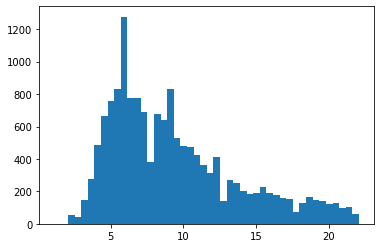

In [140]:
#Normality check
%matplotlib inline  
plt.hist(train['fare_amount'], bins='auto') #Slightly left-skewed

(array([161., 122., 320., 500., 676., 930., 888., 964., 924., 887., 792.,
        762., 671., 605., 523., 486., 471., 404., 361., 332., 312., 267.,
        224., 245., 198., 180., 163., 145., 134., 155., 119.,  95.,  99.,
         96.,  76.,  87.,  67.,  68.,  47.,  47.,  58.,  57.,  53.,  41.,
         49.,  46.,  52.,  47.,  42.,  33.,  22.,  22.,  29.,  23.,  10.,
         20.,  20.,  20.,  11.,   6.,  10.,  17.,   9.,   9.,   5.,  12.,
          7.,  13.,  11.,   5.,   5.,   7.,   4.,   7.,   5.,   6.,   8.,
          3.,   2.,   7.,   5.,   6.,  11.,   4.,   1.,   3.,   3.,   5.,
          6.,   6.,   4.,   4.,   7.,   7.,  10.,   8.,  10.,  13.,   9.,
         23.,  11.,  15.,   9.,   9.,   5.,   3.,   4.,   2.,   2.,   0.,
          1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

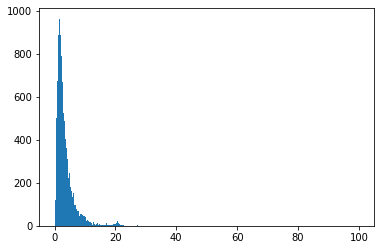

In [141]:
#Normality check
%matplotlib inline  
plt.hist(train['Distance'], bins='auto')#Completely left-skewed

In [142]:
#We need to scale these two variables because fare_amount is a bigger quantity and without scaling it would dominate our model.
#We would normalise both these variables.

In [143]:
#Normalising fare_amount:
train['fare_amount'] = (train['fare_amount'] - ((train['fare_amount']).min()))/((train['fare_amount'].max()) - (train['fare_amount']).min())

In [144]:
#Normalising Distance:
train['Distance'] = (train['Distance'] - ((train['Distance']).min()))/((train['Distance'].max()) - (train['Distance']).min())

(array([1.000e+00, 0.000e+00, 5.600e+01, 4.200e+01, 1.470e+02, 2.770e+02,
        4.850e+02, 6.660e+02, 7.590e+02, 8.320e+02, 1.277e+03, 7.780e+02,
        7.780e+02, 6.880e+02, 3.830e+02, 6.750e+02, 6.380e+02, 8.330e+02,
        5.270e+02, 4.780e+02, 4.710e+02, 4.270e+02, 3.650e+02, 3.150e+02,
        4.150e+02, 1.430e+02, 2.720e+02, 2.510e+02, 2.020e+02, 1.850e+02,
        1.930e+02, 2.260e+02, 1.920e+02, 1.780e+02, 1.590e+02, 1.530e+02,
        7.300e+01, 1.280e+02, 1.670e+02, 1.450e+02, 1.430e+02, 1.230e+02,
        1.270e+02, 9.900e+01, 1.060e+02, 6.000e+01]),
 array([0.        , 0.02173913, 0.04347826, 0.06521739, 0.08695652,
        0.10869565, 0.13043478, 0.15217391, 0.17391304, 0.19565217,
        0.2173913 , 0.23913043, 0.26086957, 0.2826087 , 0.30434783,
        0.32608696, 0.34782609, 0.36956522, 0.39130435, 0.41304348,
        0.43478261, 0.45652174, 0.47826087, 0.5       , 0.52173913,
        0.54347826, 0.56521739, 0.58695652, 0.60869565, 0.63043478,
        0.65217391, 

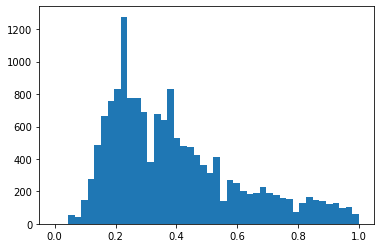

In [145]:
#Normality check
%matplotlib inline  
plt.hist(train['fare_amount'], bins='auto') 

(array([161., 122., 320., 500., 676., 930., 888., 964., 924., 887., 792.,
        762., 671., 605., 523., 486., 471., 404., 361., 332., 312., 267.,
        224., 245., 198., 180., 163., 145., 134., 155., 119.,  95.,  99.,
         96.,  76.,  87.,  67.,  68.,  47.,  47.,  58.,  57.,  53.,  41.,
         49.,  46.,  52.,  47.,  42.,  33.,  22.,  22.,  29.,  23.,  10.,
         20.,  20.,  20.,  11.,   6.,  10.,  17.,   9.,   9.,   5.,  12.,
          7.,  13.,  11.,   5.,   5.,   7.,   4.,   7.,   5.,   6.,   8.,
          3.,   2.,   7.,   5.,   6.,  11.,   4.,   1.,   3.,   3.,   5.,
          6.,   6.,   4.,   4.,   7.,   7.,  10.,   8.,  10.,  13.,   9.,
         23.,  11.,  15.,   9.,   9.,   5.,   3.,   4.,   2.,   2.,   0.,
          1.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   2.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   2.,
          0.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

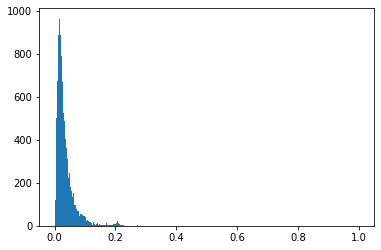

In [146]:
#Normality check
%matplotlib inline  
plt.hist(train['Distance'], bins='auto')

In [147]:
train['fare_amount'].describe()

count    15638.000000
mean         0.394318
std          0.213689
min          0.000000
25%          0.231870
50%          0.336832
75%          0.508527
max          1.000000
Name: fare_amount, dtype: float64

In [148]:
train['Distance'].describe()

count    15638.000000
mean         0.034298
std          0.034613
min          0.000000
25%          0.015236
50%          0.024648
75%          0.041249
max          1.000000
Name: Distance, dtype: float64

In [149]:
#We have successfully scaled these two variables.

# Splitting the train data into training and test data sets for comparing 

In [150]:
#X_train and y_train are training subsets.
#X_test and y_test are validation subsets.

In [151]:
X = train.drop('fare_amount',axis=1).values
y = train['fare_amount'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(train.shape, X_train.shape, X_test.shape,y_train.shape,y_test.shape)

(15638, 5) (12510, 4) (3128, 4) (12510,) (3128,)


# LINEAR REGRESSION

In [152]:
#The error metric that we will consider here is RMSE since this is a timestamp Dataset.
#Training the model on the training sets
LR_model = sm.OLS(y_train,X_train).fit()

In [153]:
#Printing the statistics
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.701
Model:                            OLS   Adj. R-squared (uncentered):              0.701
Method:                 Least Squares   F-statistic:                              7346.
Date:                Tue, 10 Sep 2019   Prob (F-statistic):                        0.00
Time:                        02:44:19   Log-Likelihood:                         -203.49
No. Observations:               12510   AIC:                                      415.0
Df Residuals:                   12506   BIC:                                      444.7
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0405      0.002     25.371      0.000       0.037       0.044
x2             0.0300      0.001     31.487      0.000       0.028       0.032
x3             0.0123      0.000     48.378      0.000       0.012       0.013
x4             1.0604      0.062     17.232      0.000       0.940       1.181
==============================================================================
Omnibus:                      686.843   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              805.543
Skew:                           0.621   Prob(JB):                    1.20e-175
Kurtosis:                       3.068   Cond. No.                         427.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [154]:
#Predicting the test dependent variable values:
predictions_LR = LR_model.predict(X_test)

In [155]:
#Calculating the RMSE:
RMSE = np.sqrt(mean_squared_error(y_test,predictions_LR))

In [156]:
RMSE

0.2402590521997648

In [157]:
#RMSE of Linear Regression Model = 0.2458 

# DECISION TREE

In [158]:
#Training the model on training sets
DT_model = DecisionTreeRegressor(max_depth=2).fit(X_train,y_train)

In [159]:
#Predicting the test dependent variable values:
predictions_DT = DT_model.predict(X_test)

In [160]:
#Calculating the RMSE:
RMSE = np.sqrt(mean_squared_error(y_test,predictions_DT))

In [161]:
RMSE

0.20971330062960003

In [162]:
#RMSE of Decision Tree Model = 0.2145

# RANDOM FOREST

In [163]:
#Training the model on training sets
RF_model = RandomForestRegressor(n_estimators=500).fit(X_train,y_train)

In [164]:
#Predicting the test dependent variable values:
predictions_RF = RF_model.predict(X_test)

In [165]:
#Calculating the RMSE:
RMSE = np.sqrt(mean_squared_error(y_test,predictions_RF))

In [166]:
RMSE

0.22758231472402046

In [167]:
#RMSE of Random Forest Model = 0.2279

In [168]:
#Since, the RMSE of Decision Tree model is lower than the RMSEs of the Linear Regression and the Random Forest models,
#we will freeze Decision Tree Model as our finalized model.

# Finalizing and Saving Model for later use

In [169]:
a=pd.read_csv('test - Copy.csv')

In [170]:
test_pickup_datetime=a['pickup_datetime']

In [171]:
#Independent variable values of train will be stored in X
X = train.drop('fare_amount',axis=1).values

In [172]:
#Dependent variable values of train will be stored in y 
y = train['fare_amount'].values

In [173]:
#Now, we will train our model using the whole train dataset and save it for using later.
DT_model2 = DecisionTreeRegressor(max_depth=2).fit(X,y)

In [174]:
#Save the model as a pickle in a file 
joblib.dump(DT_model2, 'cab_fare_DT_model.pkl') 

['cab_fare_DT_model.pkl']

In [175]:
#Load the model from the file 
SuperModel_from_joblib = joblib.load('cab_fare_DT_model.pkl')

In [176]:
#Let's predict on our test dataset
newpredictions_DT = DT_model2.predict(test)

In [177]:
Predictions_with_date = pd.DataFrame({"pickup_datetime":test_pickup_datetime,"fare_amount" : newpredictions_DT})

In [178]:
#Now lets write the predicted fare_amount in disk as .csv form
Predictions_with_date.to_csv("dt_predictions_python.csv",index=False)